# PA 2: Classification - Nearest Neighbors

## Student Details ( 1 Point)

Student Name and ID:  Sai Rohith Pasala; 1001873156  <----- Only this student will submit the assignment

Student Name and ID:  Sri Naga Venkata Pavan Kalyan Sirigibattula; 1001886149

Student Name and ID:  Rutvik Naga Sai Dondapati; 1001879177


Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

Do not upload the database file [-20 points]



## Programming Assignment Details (25 Points)

For this assignment use Jupyter notebook, Panda, and scikit.
* Load wine dataset from sklearn datasets. [1 points]
* while selecting best 3 attributes for training and testing your model. [2 points]
* Find the best K. [3 points]
* Split your dataset 70% for training, and 30% for testing the classifier. [2 points]
* Use Euclidean distance.[3 points]
* Test the classifier with three diferent numbers for neighbors and record the results.[3 points]
* Use comments to explain your code and variable names.[2 points]
* Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, andsupport) for all three different numbers.[6 points]
* Plot the classifier in a 2D projection.[3 points]

# Report (22 Points)

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:
* Describe the Nearest Neighbors method. [5 points]
* Explain what was your criteria for selecting the three attributes. [7 points]
* Visualizations of the classifier in a 2D projection, and write your observations. [5 points]
* Interprete and compare the results.[5 points]

Do not to forget to cite your sources!

## <b>Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn<b>

# - - - - - - - - - - - - - - - Answer - - - - - - - - - - - - - - - - - - 

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn import neighbors

In [2]:
titanic = pd.read_csv('titanic.csv') #Storing the csv(dataset) file to dataframe
titanic.head()
      #titaninc.head() gives the first five rows of the dataset.  
      #we will print first five rows only to examine the dataset.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#syntax to print last 5 rows of dataset
titanic.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<IPython.core.display.Javascript object>


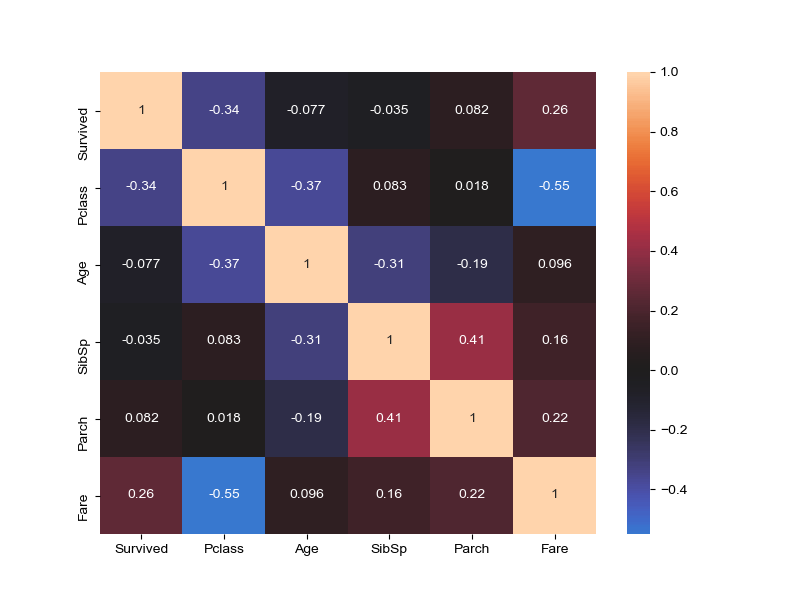

<AxesSubplot:>

In [4]:
#pearson co-relation comparision of variables before preprocessing
# https://stackoverflow.com/questions/39409866/correlation-heatmap
titanic.corr()
plt.subplots(figsize=(8,6))
sns.heatmap(titanic.corr(),center=0,annot=True)

In [5]:
#chechking for any null values in features we want to select
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
#extracting the people's titles and storing them in a seperate column for deriving a median for age variable and fill it in the place of null values
titanic['Title'] = titanic['Name'].str.extract('([A-Za-z]+)\.', expand=True)
titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [7]:
#storing the titles in above output into a array and saving the unique/Distinct ones from it

title_reduction = {'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 
                   'Master': 'Master', 'Don': 'Mr', 'Rev': 'Rev',
                   'Dr': 'Dr', 'Mme': 'Miss', 'Ms': 'Miss',
                   'Major': 'Mr', 'Lady': 'Mrs', 'Sir': 'Mr',
                   'Mlle': 'Miss', 'Col': 'Mr', 'Capt': 'Mr',
                   'Countess': 'Mrs','Jonkheer': 'Mr'}
titanic['Title'] = titanic['Title'].map(title_reduction)
titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr'], dtype=object)

In [8]:
#fiiting empty values in data with median of age compared against age group of title from name
for title, age in titanic.groupby('Title')['Age'].median().iteritems():
    print(title, age)
    titanic.loc[(titanic['Title']==title) & (titanic['Age'].isnull()), 'Age'] = age

Dr 46.5
Master 3.5
Miss 21.5
Mr 30.0
Mrs 35.0
Rev 46.5


In [9]:
#checking again whether there are any null values in age variable
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

In [10]:
#‘Sex’ column has the string value and that needs to be changed.
#I will change the ‘male’ for 0 and ‘female’ for 1
titanic['Sex'] = titanic.Sex.replace({'male':0, 
         'female':1})

In [11]:
#printing the data to check whether the above step is implemented or not
titanic['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

<IPython.core.display.Javascript object>


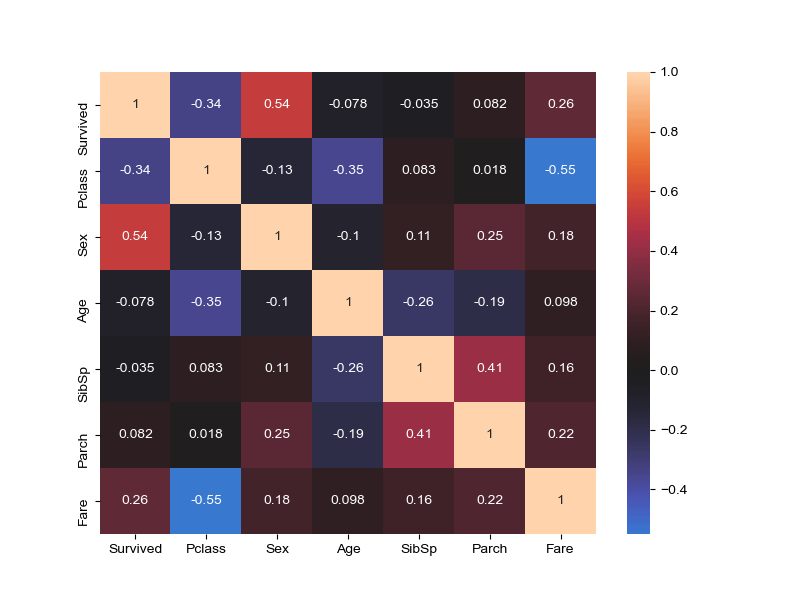

<AxesSubplot:>

In [15]:
cor=titanic.corr()
plt.subplots(figsize=(8,6))
sns.heatmap(titanic.corr(),center=0,annot=True)

In [16]:
#Correlation with output variable
cor_target = abs(cor["Survived"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features


Survived    1.000000
Pclass      0.338481
Sex         0.543351
Fare        0.257307
Name: Survived, dtype: float64

In [17]:
#Diplaying the correlation values of the dataset against target variable
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.543351,-0.078177,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.353278,0.083081,0.018443,-0.549500
Sex,0.543351,-0.131900,1.000000,-0.102851,0.114631,0.245489,0.182333
Age,-0.078177,-0.353278,-0.102851,1.000000,-0.264999,-0.188285,0.097675
SibSp,-0.035322,0.083081,0.114631,-0.264999,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.245489,-0.188285,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.182333,0.097675,0.159651,0.216225,1.000000


In [65]:
#Splitting the Features and Train/Test the data in 70:30 ratio and testing it for k=5 value

titanic1 = titanic[['Pclass','Sex','Fare','Survived']]
X = titanic1[['Pclass', 'Sex', 'Fare']].values
y = titanic1['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=1)#train:test 70:30 ratio
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

#print("accuracy for k=5")
#X=X.to_numpy()
#y=y.to_numpy()
#print(X)
#print(type(X))
#print(y)
#print(type(y))

0.8314606741573034

In [19]:
#testing the prediction of the classifier for given Training data at k value = 5
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1], dtype=int64)

In [20]:
# we predict that pclass= 3 , Sex= 1(female) and Fare=64 should give 0 as Survived(No One Survived)
knn.predict([[3, 1, 25]])

array([0], dtype=int64)

In [21]:
# we predict that pclass=2, Sex= 1(female) and Fare=64 should give 1 as Survived

knn.predict([[2, 1, 25]])

array([1], dtype=int64)

In [22]:
#Determining the best k value using above algorithm in a loop and storing accuracy in a list
training_accuracy  = []  
test_accuracy = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i,metric='euclidean')
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

<IPython.core.display.Javascript object>


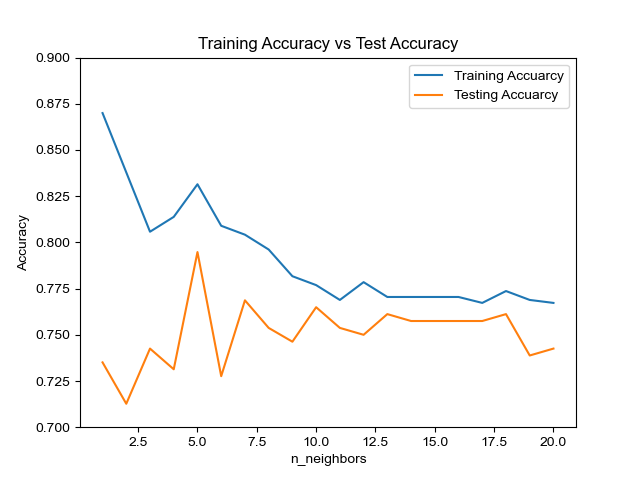

highest values for k against testing accuracy are
5followed by7	


In [23]:
#Plotting the accuarices on the graph against k values to check best k value
plt.figure()
plt.plot(range(1, 21), training_accuracy, label='Training Accuarcy')
plt.plot(range(1, 21), test_accuracy, label='Testing Accuarcy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.7, 0.9])
plt.legend(loc='best')
plt.show()

print("highest values for k against testing accuracy are"+"\n"+"5"+"followed by"+"7"+"\t")

<IPython.core.display.Javascript object>


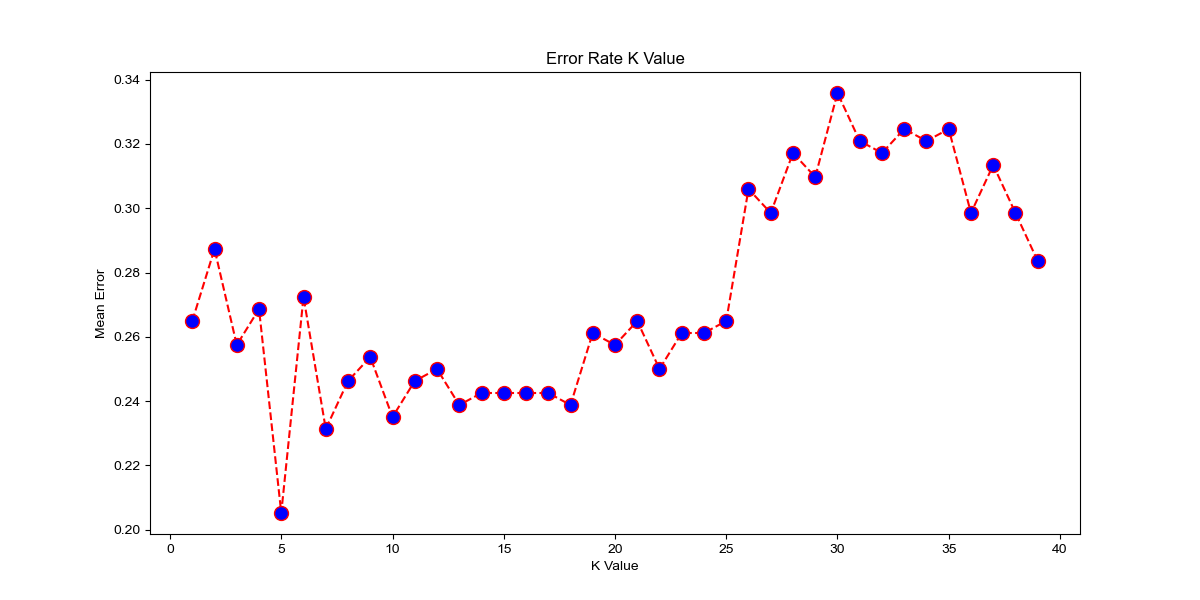

Text(0, 0.5, 'Mean Error')

In [24]:
# Calculating error for K values between 1 and 40
error = []
for i in range(1, 40):
    from sklearn import metrics 
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3,random_state=1)
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')#using euclidean
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [31]:
#storing the comparing variables and Target variable
X = titanic1[['Pclass','Sex','Fare']].values
y = titanic1['Survived'].values

In [32]:
#converting the Pandas dataset to Numpy nd array

print(type(X))
print(type(y))


#X=X.to_numpy()
#y=y.to_numpy()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [42]:
def knn(n_neighbors):     
    from sklearn import metrics 
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3,random_state=1)
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean') # using euclidean distance
    neigh.fit(X_train, y_train) # fitting the model
    y_predict = neigh.predict(X_test) # predicting the test dataset
    
    from sklearn.metrics import accuracy_score
    
    print("The Accuracy is:", accuracy_score(y_test,y_predict)*100,"\n")
    print("Confusion Matrix is: \n",'\n')
    metrics.plot_confusion_matrix(neigh, X_test, y_test,cmap=plt.cm.Blues,display_labels=["Not Survive","Survived"])
    plt.show()
    print("Classification Report: \n",classification_report(y_test,y_predict))# Classification report for 3 feature knn
    print("THE CLASSIFICATION AGAINST 2 VARIABLES FOR CLASSIFIER PLOT IN 2D")
    # 2D PROJECTION OF KNN CLASSIFIER
    A = titanic1[['Pclass','Fare']].values
    b = titanic1['Survived'].values
    A_train, A_test, b_train, b_test =  train_test_split(A, b, test_size=0.3,random_state=1)
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean') # using euclidean distance
    neigh.fit(A_train, b_train) # fitting the model
    visualise(n_neighbors,A_train,b_train)
 


In [43]:
def visualise(n_neighbors,X,y):
    h = .02  # step size in the mesh
 
  # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
 
  # Reference: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py
    for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X, y)
 
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
    # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
    # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
 
    plt.show() # plotting the classifier

The Accuracy is: 79.47761194029852 

Confusion Matrix is: 
 



<IPython.core.display.Javascript object>


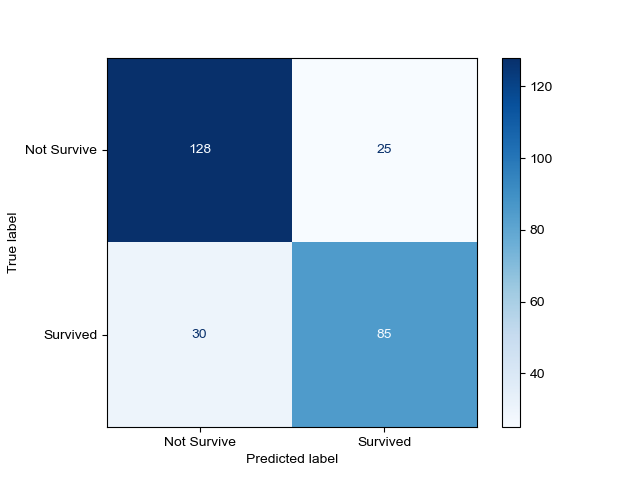

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       153
           1       0.77      0.74      0.76       115

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268

THE CLASSIFICATION AGAINST 2 VARIABLES FOR CLASSIFIER PLOT IN 2D


<IPython.core.display.Javascript object>


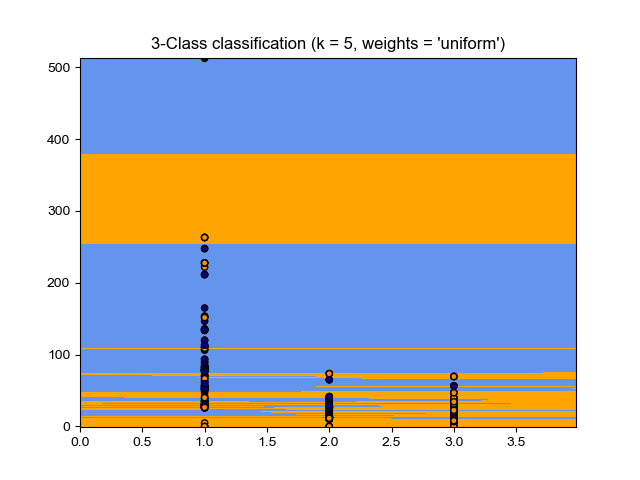

<ipython-input-43-ad4080b56674>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


<IPython.core.display.Javascript object>


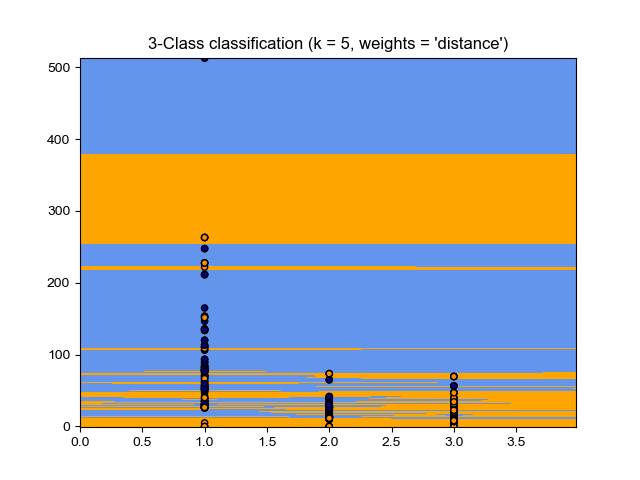

<ipython-input-43-ad4080b56674>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


In [44]:
knn(n_neighbors=5)

The Accuracy is: 75.3731343283582 

Confusion Matrix is: 
 



<IPython.core.display.Javascript object>


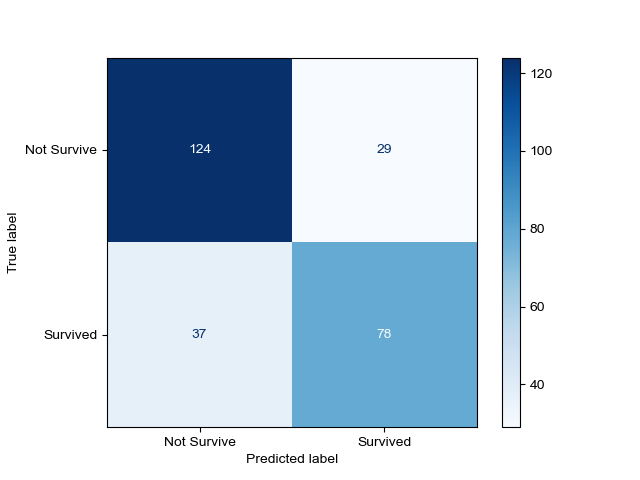

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       153
           1       0.73      0.68      0.70       115

    accuracy                           0.75       268
   macro avg       0.75      0.74      0.75       268
weighted avg       0.75      0.75      0.75       268

THE CLASSIFICATION AGAINST 2 VARIABLES FOR CLASSIFIER PLOT IN 2D


<IPython.core.display.Javascript object>


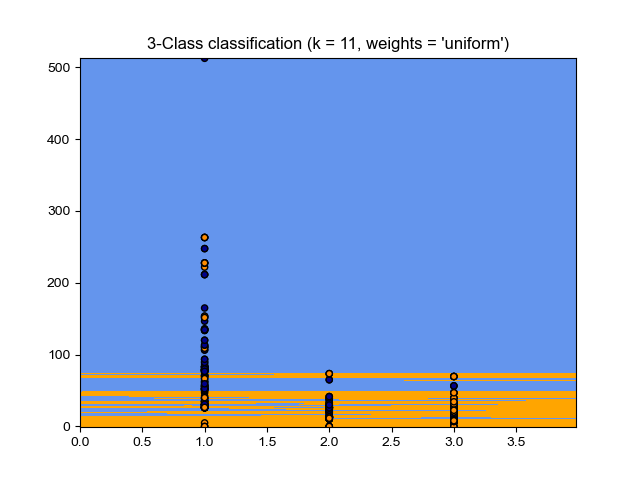

<ipython-input-43-ad4080b56674>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


<IPython.core.display.Javascript object>


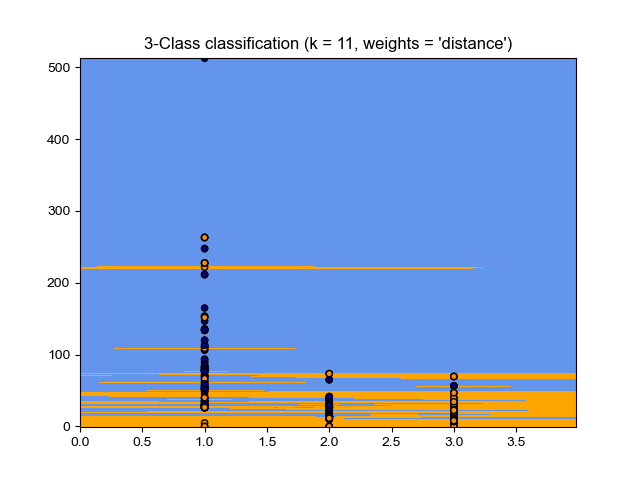

<ipython-input-43-ad4080b56674>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


In [45]:
knn(n_neighbors=11)

The Accuracy is: 73.50746268656717 

Confusion Matrix is: 
 



<IPython.core.display.Javascript object>


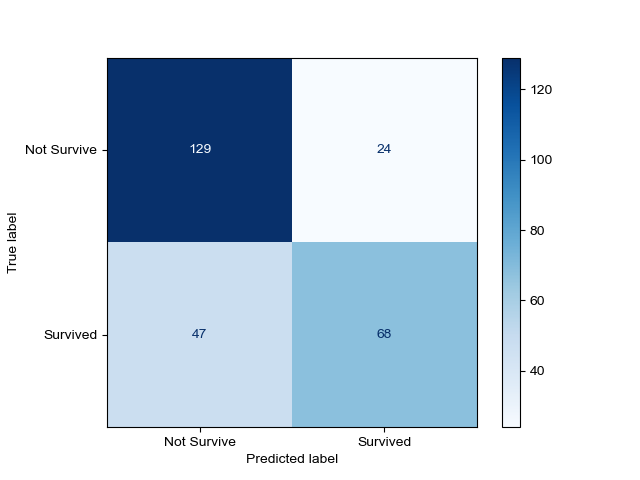

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.84      0.78       153
           1       0.74      0.59      0.66       115

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.72       268
weighted avg       0.74      0.74      0.73       268

THE CLASSIFICATION AGAINST 2 VARIABLES FOR CLASSIFIER PLOT IN 2D


<IPython.core.display.Javascript object>


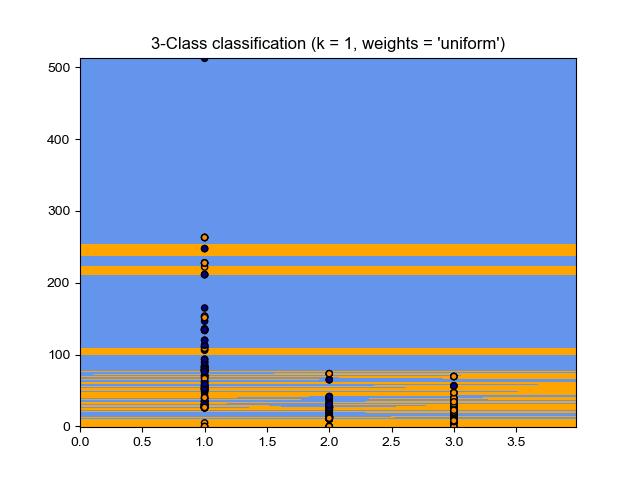

<ipython-input-43-ad4080b56674>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


<IPython.core.display.Javascript object>


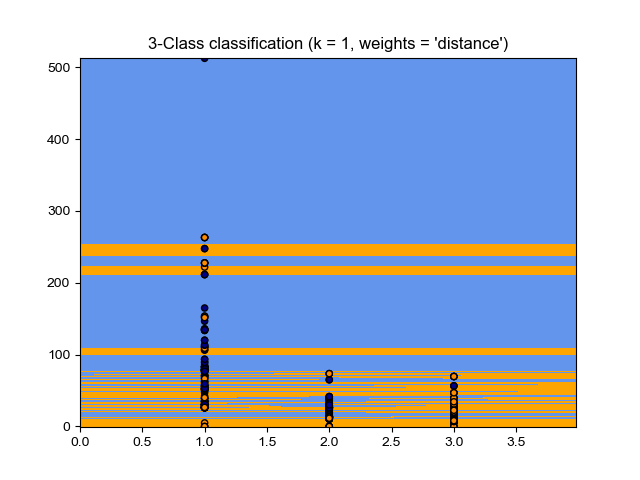

<ipython-input-43-ad4080b56674>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


In [46]:
knn(n_neighbors=1)
    

The Accuracy is: 76.86567164179104 

Confusion Matrix is: 
 



<IPython.core.display.Javascript object>


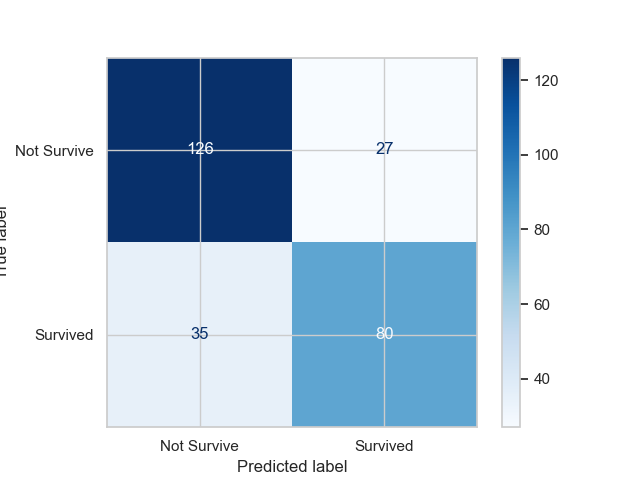

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       153
           1       0.75      0.70      0.72       115

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

THE CLASSIFICATION AGAINST 2 VARIABLES FOR CLASSIFIER PLOT IN 2D


<IPython.core.display.Javascript object>


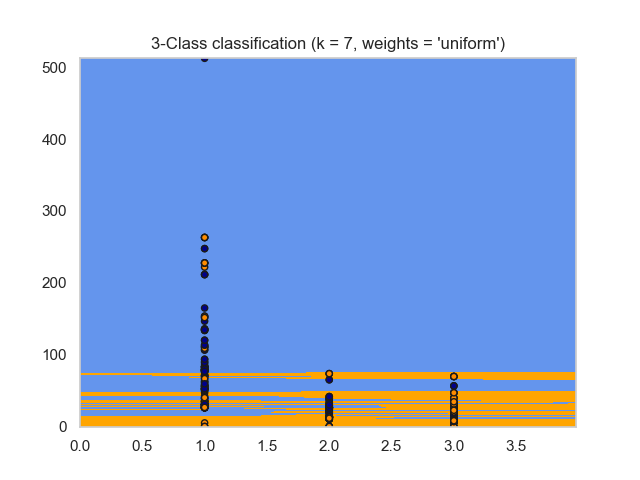

<ipython-input-43-ad4080b56674>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


<IPython.core.display.Javascript object>


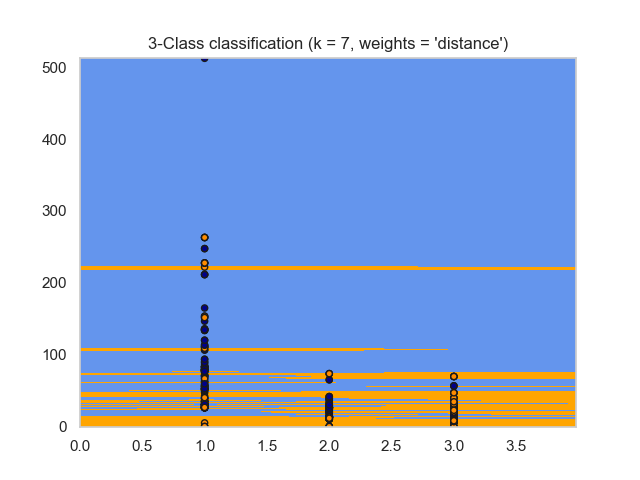

<ipython-input-43-ad4080b56674>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


In [62]:
knn(n_neighbors=7)